In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np
import os
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [3]:
data_path = r'C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano'
image_list = glob.glob(os.path.join(data_path, '*.jpg'))
target_list = glob.glob(os.path.join(data_path, '*.txt'))
for img, tar in list(zip(image_list, target_list))[:2]:
    print(img)
    print(tar)

C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano\americano1.jpg
C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano\americano1.txt
C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano\americano10.jpg
C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano\americano10.txt


In [4]:
data_path = r'C:\Users\gjust\Documents\Github\data\caffe_drinks\detection\americano\\'
class Drink_dataset(Dataset):
    
    def __init__(self, data_path, dataframe, train=True, transform=None):
        self.data_path = data_path
        self.dataframe = dataframe
        self.transform = transform
        self.image_ids = self.dataframe['image_id'].unique()
        self.train = train
        
    def __len__(self):
        
        return len(self.image_ids)
    
    def __getitem__(self, idx):        
        image_id = self.image_ids[idx]
        
        img = Image.open(self.data_path + image_id + '.jpg')
        
        boxes = self.dataframe.loc[self.dataframe['image_id'] == image_id, ['x1', 'y1', 'x2', 'y2']]
        boxes = torch.from_numpy(np.array(boxes)).type(torch.FloatTensor)
        
        labels = torch.ones((boxes.shape[0]), ).type(torch.int64)
        
        targets = {}
        targets['boxes'] = boxes
        targets['labels'] = labels
        
        if self.train:
            t = self.transform['train']
            img = t(img)
            
        else:
            img = self.transform['test'](img)
            
        return img, targets

def collate_fn(batch):
    return tuple(zip(*batch))

In [5]:
transform = {
    'train' : transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomAffine(30),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
    ]),
    
    'test' : transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

In [15]:
df = pd.read_csv(data_path + 'target.csv', index_col=0)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))

image = sample[0].permute(1,2,0).cpu().numpy()
boxes = output[0]['boxes'].cpu().numpy()

plt.imshow(image)

for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
plt.show()

In [95]:
def show_img(data, size=4, shape=(2,2), pred=False):
    images_tuple, targets_tuple = data
    
    fig, axes = plt.subplots(shape[0], shape[1], figsize=(10,10))
    if size >= 2:
        axes = axes.ravel()
    
    for i, (img, target_dict) in enumerate(zip(images_tuple, targets_tuple)):
        img = inv_normalize(img)
        images_numpy = np.array(img.permute(1,2,0))
        
        class_name = target_dict['labels'].item()
        
        boxes = target_dict['boxes'].numpy()
        
        axes[i].imshow(images_numpy)
        axes[i].axis('off')
        axes[i].set_title(class_name)
        
        for box in boxes:
            rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)   

NameError: name 'shape' is not defined

In [105]:
def show_img(data, size=2, shape=(1,2), pred=False):
    images_tuple, targets_tuple = data
    
    fig, axes = plt.subplots(shape[0], shape[1], figsize=(10,10))
    if size >= 2:
        axes = axes.ravel()
    
    for i, (img, target_dict) in enumerate(zip(images_tuple, targets_tuple)):
        img = inv_normalize(img)
        images_numpy = np.array(img.permute(1,2,0))
                
        boxes = target_dict['boxes'].numpy()
        
        axes[i].imshow(images_numpy)
        axes[i].axis('off')
        
        for box in boxes:
            rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)   

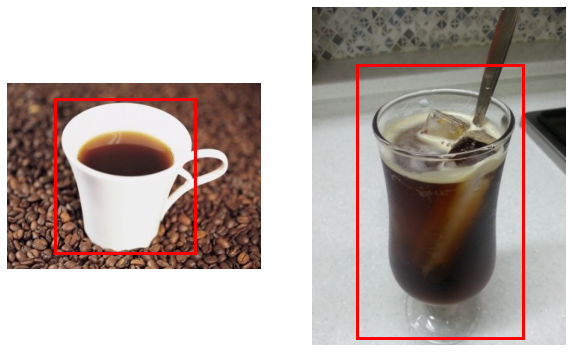

In [107]:
show_img(iter(trainloader).next(), size=2, shape=(1,2), pred=False)

In [70]:
images_tuple, targets_tuple = iter(trainloader).next()

for i, (img, target_dict) in enumerate(zip(images_tuple, targets_tuple)):
    print(img, target_dict)

tensor([[[-0.0801, -0.1314, -0.1314,  ...,  0.2282,  0.2111,  0.2282],
         [-0.1314, -0.1486, -0.1314,  ...,  0.2111,  0.1939,  0.1939],
         [-0.1314, -0.1314, -0.0801,  ...,  0.1597,  0.1597,  0.1597],
         ...,
         [-0.4226, -0.3883, -0.2684,  ..., -0.6965, -0.6794, -0.6623],
         [-0.4397, -0.3883, -0.3712,  ..., -0.6965, -0.6965, -0.7308],
         [-0.4226, -0.3883, -0.3883,  ..., -0.6623, -0.6965, -0.7308]],

        [[-0.0049, -0.0574, -0.0574,  ...,  0.2402,  0.2227,  0.2402],
         [-0.0574, -0.0749, -0.0574,  ...,  0.2227,  0.2052,  0.2052],
         [-0.0574, -0.0574, -0.0049,  ...,  0.1352,  0.1352,  0.1352],
         ...,
         [-0.3375, -0.3025, -0.1800,  ..., -0.6352, -0.6176, -0.6001],
         [-0.3550, -0.3025, -0.2850,  ..., -0.6352, -0.6352, -0.6176],
         [-0.3375, -0.3025, -0.3025,  ..., -0.5476, -0.5826, -0.6176]],

        [[ 0.1302,  0.0779,  0.0779,  ...,  0.3219,  0.3045,  0.3219],
         [ 0.0779,  0.0605,  0.0779,  ...,  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


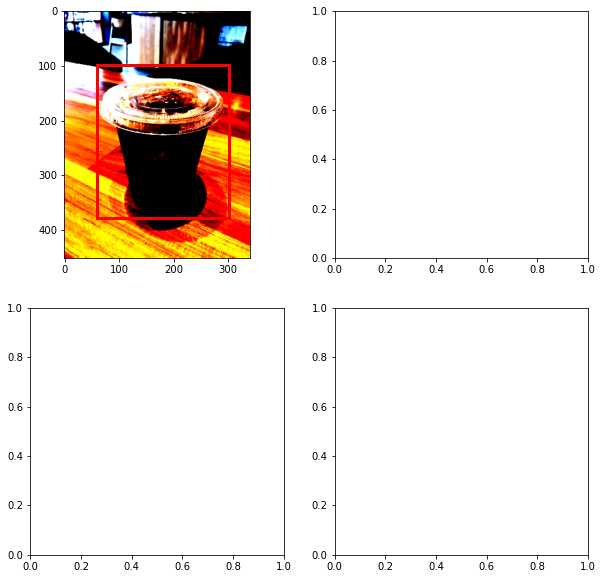

In [63]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
axes = ax.ravel()

axes[0].imshow(sample)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
    axes[0].add_patch(rect)

In [62]:
boxes

tensor([[ 59.0000,  99.0000, 301.0001, 379.0002]])

In [25]:
targets

({'boxes': tensor([[ 35.0001, 100.0002, 272.0002, 379.0002]]),
  'labels': tensor([1])},
 {'boxes': tensor([[  9.0000,  34.0001, 332.9999, 404.0001]]),
  'labels': tensor([1])})

In [48]:
sample

array([[[-1.2787911 , -0.547619  ,  1.1759479 ],
        [-1.1931673 , -0.47759098,  1.2108063 ],
        [-1.004795  , -0.32002798,  1.2805231 ],
        ...,
        [-0.5081771 , -0.862745  , -1.0027015 ],
        [-0.5253019 , -0.880252  , -1.0201306 ],
        [-0.5253019 , -0.880252  , -1.0201306 ]],

       [[-0.9362959 , -0.21498597,  1.5768193 ],
        [-0.9362959 , -0.19747896,  1.5593902 ],
        [-0.88492167, -0.16246496,  1.4896734 ],
        ...,
        [-0.43967807, -0.792717  , -0.9329847 ],
        [-0.43967807, -0.792717  , -0.9329847 ],
        [-0.45680285, -0.810224  , -0.9504139 ]],

       [[-0.7136741 ,  0.03011205,  1.8905448 ],
        [-0.69654936,  0.03011205,  1.8556864 ],
        [-0.7479236 , -0.03991595,  1.6988237 ],
        ...,
        [-0.45680285, -0.792717  , -1.0027015 ],
        [-0.45680285, -0.792717  , -1.0027015 ],
        [-0.45680285, -0.792717  , -1.0027015 ]],

       ...,

       [[ 0.63918144, -0.617647  , -1.0375599 ],
        [ 0

In [45]:
trainset = Drink_dataset(data_path, df, train=False, transform=transform)
trainloader = DataLoader(trainset, batch_size=2, shuffle=True, collate_fn = collate_fn)

sample, targets = iter(trainloader).next()
len(sample)

2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


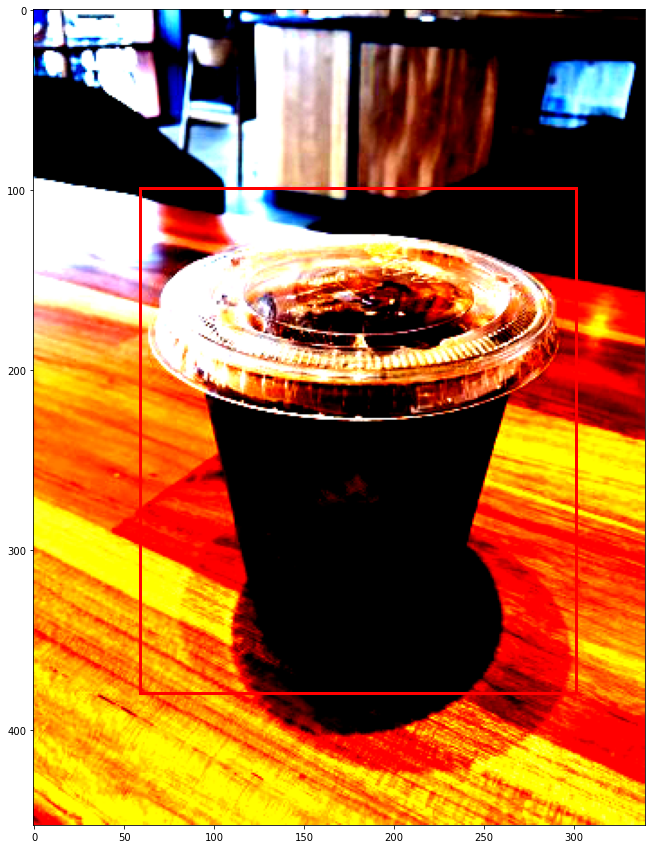

In [47]:
sample = sample[0].permute(1,2,0).numpy()
boxes = targets[0]['boxes']

fig, ax = plt.subplots(1,1, figsize=(15,15))

plt.imshow(sample)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
plt.show()